# **Personal Identity**

Nama  : [Antonius Wisnumurti Sulistyanto](https://www.linkedin.com/in/antonius-wisnumurti-sulistyanto/)

Kelas : DS Batch 33 A

# Understand Data

This data orign from [Kaggle](https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset), it represent transaction of retail company from 2023 - 2024. This data includes various attributes such as customer ID, name, email, phone, address, city, state, zipcode, country, age, gender, income, customer segment, last purchase date, total purchases, amount spent, product category, product brand, product type, feedback, shipping method, payment method, and order status.

## Data Dictionary
- Transaction_ID: it represent customers transactions id
- Customer_ID: this is a customers id without it nothing possible
- Name: customers names here
- Email: customers and users emails
- Phone: cust. phone no
- Address: their address
- City: cust. city
- State: their state
- Zipcode: their zipcode
- Country: customer country
- Age: their age
- Gender: gender
- Income: cust. income like : high , low
- Customer_Segment: segment like : regular ,vip like
- Date: dates of purchase
- Year: year
- Month: month of purchase
- Time: time for purchasing
- Total_Purchases: total how many purchase
- Amount: amount spend
- Total_Amount: total amount spended here
- Product_Category: products category
- Product_Brand: brand
- Product_Type: their type
- Feedback: customer feedback
- Shipping_Method: shipping type : like : same day etc.
- Payment_Method: payment method like : cash
- Order_Status: order status : pending , completed
- Ratings: product ratings
- products: products names

# Bussines Understanding
Retail company have great total transactions in USA, and want to analyze their own transactions to understand their customers behavior like how much they spend their own money, how often they come to bought in our company, and how long they want to come back to our company. I will analyze with RFM method. With that understanding company can know  what kind of type of their customers, and can give them specific promotion, treat, benefit, voucher, etc and end up with incrased sales


# Questions
1. How much total sales, transactions, and customers that company have?
2. Which segments are the largest by number of customers?
3. Which segments are have highest frequency?
4. Trend customer segment over time, are there any change over months?
5. What type of promotions should be assigned to each segment?

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

I have put my dataset in a google drive folder and I need to mount the google drive to access it.

In [ ]:
#set up connection to google drive
from google.colab import drive
drive.mount('/content/drive/')

data_path = '/content/drive/My Drive/Final Project DA - Antonius Wisnumurti Sulistyanto/'

Mounted at /content/drive/


# Read Data

## 1. Read data set from csv file

In [ ]:
#load data
data_1 = pd.read_csv(data_path + 'new_retail_data.csv')
data_1.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
65750,6314260.0,77318.0,Lauren Moon,Gregory17@gmail.com,8.601488e+09,50978 Justin Lakes,Portsmouth,England,70659.0,UK,20.0,Male,Medium,Premium,6/28/2023,2023.0,June,7:14:18,9.0,219.967242,1979.705178,Electronics,Sony,Headphones,Excellent,Standard,PayPal,Delivered,5.0,Wireless headphones
15101,1556688.0,47581.0,Jennifer Ortiz,Brandon48@gmail.com,9.080985e+09,3693 Taylor Orchard,Portsmouth,England,68340.0,UK,19.0,Female,Medium,Regular,8/9/2023,2023.0,August,7:39:10,8.0,58.388054,467.104430,Clothing,Adidas,T-shirt,Excellent,Standard,Debit Card,Delivered,4.0,Off-the-shoulder tee
240123,3132361.0,82409.0,Toni Wallace,Courtney95@gmail.com,9.272396e+09,28772 Wilson Walk Suite 180,Albury-Wodonga,New South Wales,70775.0,Australia,26.0,Female,High,Premium,1/7/2024,2024.0,May,16:25:21,4.0,143.878461,575.513844,Books,Penguin Books,Fiction,Excellent,Standard,Cash,Delivered,5.0,Horror
300503,5555620.0,44106.0,Adam Williams,Kevin88@gmail.com,7.150244e+09,754 Jackson Stream Apt. 007,Sacramento,New Hampshire,3833.0,USA,28.0,Male,Low,New,7/18/2023,2023.0,July,14:18:17,5.0,449.313599,2246.567993,Books,Penguin Books,Fiction,Average,Express,Credit Card,Delivered,2.0,Thriller
88902,4782919.0,62252.0,Tyrone Johnson,Donald36@gmail.com,9.081149e+09,3687 Ronald Fork,Chicago,Connecticut,77783.0,USA,34.0,Female,Low,Regular,11/5/2023,2023.0,November,9:04:07,6.0,377.695137,2266.170821,Grocery,Pepsi,Water,Good,Standard,Credit Card,Delivered,3.0,Artesian water


## 2. Check data types for every columns

In [ ]:
#info data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

- Total Column are 30 with rows 302010
- All columns have correct data type, except Date, Year, Month, and Time should convert to date

## 3. Check duplicated value in every column

In [ ]:
#check duplicate values
print('Duplicate values is ', data_1.duplicated().sum())

Duplicate values is  4


In [ ]:
#shows all duplicate values
data_1[data_1.duplicated(keep = False)]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
181615,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,63.0,Male,Low,Regular,5/5/2023,2023.0,May,4:17:21,8.0,191.906886,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
182139,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,59.0,Male,Low,New,11/23/2023,2023.0,November,15:35:49,9.0,272.327418,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea
190525,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,54.0,Male,Low,New,12/19/2023,2023.0,December,11:33:48,6.0,NaN,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
292839,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,54.0,Female,Low,Regular,12/10/2023,2023.0,December,1:09:09,7.0,134.374182,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
299759,4476510.0,20103.0,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,54.0,Female,Low,Regular,12/10/2023,2023.0,December,1:09:09,7.0,134.374182,940.619277,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.0,Off-the-shoulder tee
301094,5340129.0,29920.0,Collin Davis,Courtney47@gmail.com,4.087767e+09,371 Cynthia Drives Suite 699,Wollongong,New South Wales,47758.0,Australia,54.0,Male,Low,New,12/19/2023,2023.0,December,11:33:48,6.0,NaN,2201.568075,Grocery,Pepsi,Soft Drink,Excellent,Express,Cash,Delivered,4.0,Fruit punch
301362,4942326.0,25416.0,Pamela Martin,Christine83@gmail.com,6.657934e+09,9851 Myers Tunnel,Leicester,England,57655.0,UK,63.0,Male,Low,Regular,5/5/2023,2023.0,May,4:17:21,8.0,191.906886,1535.255087,Clothing,Adidas,Jacket,Average,Same-Day,Cash,Pending,2.0,Varsity jacket
301486,3200766.0,49598.0,Mikayla Mueller,Kenneth43@gmail.com,6.980439e+09,716 Joshua Rapids Apt. 790,Bremen,Berlin,64747.0,Germany,59.0,Male,Low,New,11/23/2023,2023.0,November,15:35:49,9.0,272.327418,2450.946762,Grocery,Pepsi,Soft Drink,Bad,Standard,Cash,Pending,1.0,Iced tea


- There are 8 rows that contain same transaction_id, because transaction_id is a unique values that represent different between one transaction with others, and all row have same values either

## 4. Check miss value in every columns

In [ ]:
#check miss value
miss_value = data_1.isnull().sum().reset_index().rename(columns = {'index':'column', 0:'miss_value'})
miss_value

,column,miss_value
0,Transaction_ID,333
1,Customer_ID,308
2,Name,382
3,Email,347
4,Phone,362
5,Address,315
6,City,248
7,State,281
8,Zipcode,340
9,Country,271


- There are lot of missing values in every columns but range of means value only from 100 until less than 400
- If I have 300k+ rows, percentage of miss valeus in every columns are around less than 1%
- But I will check percentage from every columns later at Data Cleaning section

## 5. Check values doesn't match with column name

In [ ]:
#check values doesn't match with column
list_column = data_1.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_1[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------Transaction_ID-------------------------------


,Transaction_ID,count
0,1000007.0,1
1,1000043.0,1
2,1000073.0,1
3,1000088.0,1
4,1000154.0,1
...,...,...
294456,9999823.0,1
294457,9999909.0,1
294458,9999922.0,1
294459,9999945.0,1


-------------------------------Customer_ID-------------------------------


,Customer_ID,count
0,10000.0,4
1,10001.0,5
2,10002.0,5
3,10003.0,2
4,10004.0,2
...,...,...
86761,99995.0,8
86762,99996.0,4
86763,99997.0,4
86764,99998.0,5


-------------------------------Name-------------------------------


,Name,count
0,Aaron Adams,3
1,Aaron Aguilar,1
2,Aaron Alexander,2
3,Aaron Allen,3
4,Aaron Allen PhD,1
...,...,...
159385,Zoe Smith,3
159386,Zoe Stewart,1
159387,Zoe Torres,1
159388,Zoe Wade,1


-------------------------------Email-------------------------------


,Email,count
0,Aaron100@gmail.com,11
1,Aaron10@gmail.com,11
2,Aaron11@gmail.com,13
3,Aaron12@gmail.com,10
4,Aaron13@gmail.com,7
...,...,...
52892,Zoe93@gmail.com,1
52893,Zoe95@gmail.com,1
52894,Zoe96@gmail.com,2
52895,Zoe97@gmail.com,1


-------------------------------Phone-------------------------------


,Phone,count
0,1.000049e+09,1
1,1.000051e+09,1
2,1.000061e+09,1
3,1.000135e+09,1
4,1.000140e+09,1
...,...,...
299290,9.999835e+09,1
299291,9.999896e+09,1
299292,9.999910e+09,1
299293,9.999975e+09,1


-------------------------------Address-------------------------------


,Address,count
0,000 Alex Burg Apt. 421,1
1,000 Alexander Estate,1
2,000 Ana Rapids Apt. 400,1
3,000 Anderson Burg Suite 449,1
4,000 Andrade Turnpike Apt. 044,1
...,...,...
299324,99993 Nguyen Forges Apt. 544,1
299325,99993 Reginald Wells Apt. 737,1
299326,99995 Carr Port,1
299327,99996 Cox Court Suite 855,1


-------------------------------City-------------------------------


,City,count
0,Adelaide,2221
1,Albuquerque,907
2,Albury-Wodonga,2275
3,Arlington,856
4,Atlanta,890
...,...,...
125,Wichita,873
126,Windsor,2190
127,Winnipeg,2406
128,Wollongong,2262


-------------------------------State-------------------------------


,State,count
0,Alabama,909
1,Alaska,887
2,Arizona,863
3,Arkansas,896
4,Berlin,52822
5,California,952
6,Colorado,883
7,Connecticut,21658
8,Delaware,904
9,England,63059


-------------------------------Zipcode-------------------------------


,Zipcode,count
0,501.0,2
1,502.0,1
2,503.0,1
3,504.0,1
4,505.0,2
...,...,...
93973,99945.0,5
93974,99946.0,2
93975,99947.0,5
93976,99948.0,5


-------------------------------Country-------------------------------


,Country,count
0,Australia,45319
1,Canada,45301
2,Germany,52830
3,UK,63066
4,USA,95223


-------------------------------Age-------------------------------


,Age,count
0,18.0,2480
1,19.0,16846
2,20.0,34678
3,21.0,8054
4,22.0,23023
5,23.0,18033
6,24.0,6189
7,25.0,2594
8,26.0,24671
9,27.0,2571


-------------------------------Gender-------------------------------


,Gender,count
0,Female,114094
1,Male,187599


-------------------------------Income-------------------------------


,Income,count
0,High,75229
1,Low,96261
2,Medium,130230


-------------------------------Customer_Segment-------------------------------


,Customer_Segment,count
0,New,91187
1,Premium,64387
2,Regular,146221


-------------------------------Date-------------------------------


,Date,count
0,1/1/2024,831
1,1/10/2024,859
2,1/11/2024,775
3,1/12/2024,890
4,1/13/2024,791
...,...,...
361,9/5/2023,862
362,9/6/2023,857
363,9/7/2023,801
364,9/8/2023,863


-------------------------------Year-------------------------------


,Year,count
0,2023.0,251852
1,2024.0,49808


-------------------------------Month-------------------------------


,Month,count
0,April,41301
1,August,33012
2,December,18945
3,February,18259
4,January,37284
5,July,30886
6,June,18380
7,March,19142
8,May,28331
9,November,18416


-------------------------------Time-------------------------------


,Time,count
0,0:00:00,2
1,0:00:01,2
2,0:00:02,2
3,0:00:03,7
4,0:00:04,2
...,...,...
83672,9:59:55,1
83673,9:59:56,2
83674,9:59:57,6
83675,9:59:58,4


-------------------------------Total_Purchases-------------------------------


,Total_Purchases,count
0,1.0,31894
1,2.0,31908
2,3.0,31862
3,4.0,31575
4,5.0,31921
5,6.0,28535
6,7.0,28445
7,8.0,28702
8,9.0,28455
9,10.0,28352


-------------------------------Amount-------------------------------


,Amount,count
0,10.000219,1
1,10.000753,1
2,10.003750,1
3,10.006109,1
4,10.006769,1
...,...,...
299292,499.993884,1
299293,499.995511,1
299294,499.996681,1
299295,499.997024,1


-------------------------------Total_Amount-------------------------------


,Total_Amount,count
0,10.003750,1
1,10.011336,1
2,10.056353,1
3,10.063269,1
4,10.068154,1
...,...,...
299300,4998.603558,1
299301,4998.723479,1
299302,4999.171428,1
299303,4999.340097,1


-------------------------------Product_Category-------------------------------


,Product_Category,count
0,Books,54622
1,Clothing,54741
2,Electronics,71196
3,Grocery,66786
4,Home Decor,54382


-------------------------------Product_Brand-------------------------------


,Product_Brand,count
0,Adidas,18238
1,Apple,18073
2,Bed Bath & Beyond,18244
3,BlueStar,2256
4,Coca-Cola,18392
5,HarperCollins,18353
6,Home Depot,18145
7,IKEA,17994
8,Mitsubhisi,6724
9,Nestle,18109


-------------------------------Product_Type-------------------------------


,Product_Type,count
0,Bathroom,6026
1,Bedding,6011
2,BlueStar AC,2256
3,Children's,6147
4,Chocolate,6051
5,Coffee,6178
6,Decorations,12178
7,Dress,6123
8,Fiction,18045
9,Fridge,7445


-------------------------------Feedback-------------------------------


,Feedback,count
0,Average,62674
1,Bad,43299
2,Excellent,100755
3,Good,95098


-------------------------------Shipping_Method-------------------------------


,Shipping_Method,count
0,Express,102356
1,Same-Day,104156
2,Standard,95161


-------------------------------Payment_Method-------------------------------


,Payment_Method,count
0,Cash,73810
1,Credit Card,90116
2,Debit Card,76790
3,PayPal,60997


-------------------------------Order_Status-------------------------------


,Order_Status,count
0,Delivered,130449
1,Pending,49103
2,Processing,57199
3,Shipped,65024


-------------------------------Ratings-------------------------------


,Ratings,count
0,1.0,43299
1,2.0,62674
2,3.0,47636
3,4.0,98064
4,5.0,50153


-------------------------------products-------------------------------


,products,count
0,4K TV,1195
1,A-line dress,620
2,Acer Iconia Tab,1268
3,Acer Swift,574
4,Action,618
...,...,...
313,Wrap dress,617
314,Wrench,577
315,Xiaomi Mi,1834
316,iPad,1185


- There's no values that don't match with column

## 6. Descriptive Statistic

In [ ]:
#descriptive statistic for numerical type
descriptive_numerical = data_1.describe()
descriptive_numerical

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


- Transcation_ID, Customer_ID, Phone, and Zipcode have numerical data type but it only use as identity
- Age, Total_Purchases, Amount, and Ratings have symetrical distribution, becasue mean and median value is not have huge gap
- Ratings and Year have discrete, have certain limit values which mean can't be calculated

In [ ]:
#descriptive statistic for categorical type
descriptive_categorical = data_1.describe(include='object').T
descriptive_categorical

,count,unique,top,freq
Name,301628,159390,Michael Smith,144
Email,301663,52897,Michael59@gmail.com,93
Address,301695,299329,34070 Angela Islands,2
City,301762,130,Chicago,21652
State,301729,54,England,63059
Country,301739,5,USA,95223
Gender,301693,2,Male,187599
Income,301720,3,Medium,130230
Customer_Segment,301795,3,Regular,146221
Date,301651,366,11/22/2023,910


- City that have most huge transaction is Chicago
- This retail company have a lot Male buyers
- November 22, 2023 is day when transaction at peak
- Income class Middle is greater than Low, or High

# Data Cleaning

## 1. Filtered Data in USA country

In [ ]:
#filtered data
data_usa = data_1[data_1['Country'] == 'USA']
data_usa.sample(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
292737,4984308.0,89454.0,Michael Andrews,Alvin18@gmail.com,6.205642e+09,8303 Jessica Garden Apt. 249,Minneapolis,Alaska,99680.0,USA,31.0,Female,Medium,New,7/1/2023,2023.0,July,8:32:28,7.0,439.648464,3077.539245,Home Decor,Home Depot,Decorations,Good,Same-Day,Credit Card,Delivered,4.0,Rugs
76437,7145940.0,78507.0,Katherine Rangel,Sandra10@gmail.com,5.699755e+09,286 Christopher Underpass Suite 595,Chicago,Connecticut,24127.0,USA,34.0,Female,High,Premium,7/26/2023,2023.0,July,8:31:03,4.0,66.463660,265.854639,Books,Random House,Literature,Excellent,Standard,PayPal,Delivered,5.0,Short stories
21794,4925191.0,27975.0,Johnny Perez,Richard63@gmail.com,4.417492e+09,62819 Mary Estates Suite 869,Fort Worth,New Mexico,32746.0,USA,19.0,Female,Low,New,5/3/2023,2023.0,May,0:17:08,5.0,147.615713,738.078563,Grocery,Pepsi,Water,Good,Same-Day,Cash,Delivered,3.0,Purified water
159690,9203988.0,80462.0,Brittney Webb,Joseph27@gmail.com,2.573476e+09,628 Tamara Well Apt. 650,Boston,Georgia,21055.0,USA,23.0,Male,High,Regular,7/26/2023,2023.0,July,12:25:48,8.0,268.603373,2148.826987,Home Decor,IKEA,Lighting,Bad,Express,Debit Card,Processing,1.0,Track lighting
46061,3608971.0,15071.0,Kelly Moore,Peggy7@gmail.com,3.901336e+09,218 Brooks Valleys Apt. 590,Chicago,Wisconsin,53577.0,USA,20.0,Male,Low,Regular,6/21/2023,2023.0,June,8:46:02,5.0,305.711040,1528.555198,Books,HarperCollins,Non-Fiction,Average,Standard,Debit Card,Delivered,2.0,Memoir


## 2. Alter Data type

In [ ]:
#check data type
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95223 entries, 17800 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    95103 non-null  float64
 1   Customer_ID       95122 non-null  float64
 2   Name              95102 non-null  object 
 3   Email             95120 non-null  object 
 4   Phone             95104 non-null  float64
 5   Address           95115 non-null  object 
 6   City              95174 non-null  object 
 7   State             95174 non-null  object 
 8   Zipcode           95109 non-null  float64
 9   Country           95223 non-null  object 
 10  Age               95197 non-null  float64
 11  Gender            95122 non-null  object 
 12  Income            95132 non-null  object 
 13  Customer_Segment  95154 non-null  object 
 14  Date              95103 non-null  object 
 15  Year              95111 non-null  float64
 16  Month             95148 non-null  object

- I only alter data type of Date, because it contain all parts od dates, like day, month, and year

In [ ]:
#alter data type column date
data_usa['Date'] = pd.to_datetime(data_usa['Date'])
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95223 entries, 17800 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    95103 non-null  float64       
 1   Customer_ID       95122 non-null  float64       
 2   Name              95102 non-null  object        
 3   Email             95120 non-null  object        
 4   Phone             95104 non-null  float64       
 5   Address           95115 non-null  object        
 6   City              95174 non-null  object        
 7   State             95174 non-null  object        
 8   Zipcode           95109 non-null  float64       
 9   Country           95223 non-null  object        
 10  Age               95197 non-null  float64       
 11  Gender            95122 non-null  object        
 12  Income            95132 non-null  object        
 13  Customer_Segment  95154 non-null  object        
 14  Date              9510

/tmp/ipython-input-13-412134566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['Date'] = pd.to_datetime(data_usa['Date'])


In [ ]:
#check satistic Date volumn
data_usa['Date'].describe()

,Date
count,95103
mean,2023-08-30 10:13:58.307939840
min,2023-03-01 00:00:00
25%,2023-05-31 00:00:00
50%,2023-08-30 00:00:00
75%,2023-11-30 00:00:00
max,2024-02-29 00:00:00


- Data type of Date have been altered to datetime

- First record transaction happen in 1 March 2023 and ended in 29 February 2024, +/- 1year

## 3. Drop column that not use for future analysis

In [ ]:
#drop column that not using in future anylsis
data_usa = data_usa.drop(['Name',
                      'Email',
                      'Phone',
                      'Address',
                      'Customer_Segment',
                      'Year',
                      'Month',
                      'Time',
                      'Feedback',
                      'Shipping_Method',
                      'Payment_Method',
                      'Order_Status',
                      'Ratings'], axis=1)

In [ ]:
#check data_usa
data_usa.sample(5)

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,products
161799,6698878.0,22171.0,New York,Kansas,19599.0,USA,23.0,Male,High,2023-12-14,6.0,170.128581,1020.771485,Electronics,Sony,Headphones,Studio headphones
164475,4151211.0,61416.0,New York,Kansas,26270.0,USA,23.0,Female,Medium,2023-12-13,1.0,194.678961,194.678961,Clothing,Zara,Dress,Shift dress
205788,4678557.0,81121.0,Nashville,Arkansas,72857.0,USA,20.0,Male,Low,2023-03-20,1.0,460.157366,460.157366,Electronics,Sony,Smartphone,iPhone
223447,2325547.0,82486.0,Minneapolis,Tennessee,37272.0,USA,69.0,Male,Low,2023-06-27,3.0,87.277830,261.833489,Books,HarperCollins,Non-Fiction,Business
142581,1858485.0,25312.0,San Francisco,Maine,7356.0,USA,26.0,Male,High,2024-01-24,2.0,288.081957,576.163914,Grocery,Nestle,Coffee,Latte


In [ ]:
#check new info data_usa
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95223 entries, 17800 to 302009
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    95103 non-null  float64       
 1   Customer_ID       95122 non-null  float64       
 2   City              95174 non-null  object        
 3   State             95174 non-null  object        
 4   Zipcode           95109 non-null  float64       
 5   Country           95223 non-null  object        
 6   Age               95197 non-null  float64       
 7   Gender            95122 non-null  object        
 8   Income            95132 non-null  object        
 9   Date              95103 non-null  datetime64[ns]
 10  Total_Purchases   95104 non-null  float64       
 11  Amount            95105 non-null  float64       
 12  Total_Amount      95111 non-null  float64       
 13  Product_Category  95136 non-null  object        
 14  Product_Brand     9514

- I dropped column Name, Email, Phone, and Addres because I dont need personal information to make customers segmentation
- Customner segment is column that orign from dataset, but cause I want to make new customers segmentation wit RFM, I dicedid to get rid this column
- Year, Month, Time columns also get fdropped because I have Date column that contain day, month, and year. Time don't use because it's not time anylsis
- Feedbacks, and Ratings don't use in this segmentation
- Shipping_Method, Payment_Method, and Order_Status also don't needed for this segmentation

## 4. Duplicate Handling

In [ ]:
#drop duplicate values
print('Duplicate Values is ', data_usa.duplicated().sum())

duplicate_values = data_usa[data_usa.duplicated(keep = False)].sort_values('Transaction_ID')
duplicate_values

Duplicate Values is  18


,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,products
219023,1291651.0,73672.0,Virginia Beach,Ohio,45327.0,USA,29.0,Male,High,2023-10-20,5.0,14.466746,72.333731,Clothing,Adidas,T-shirt,Crop top
301779,1291651.0,73672.0,Virginia Beach,Ohio,45327.0,USA,29.0,Male,High,2023-10-20,5.0,14.466746,72.333731,Clothing,Adidas,T-shirt,Crop top
300626,1292374.0,97986.0,Houston,Kentucky,40958.0,USA,53.0,Male,High,2024-01-09,9.0,131.083702,1179.753319,Home Decor,Home Depot,Furniture,Bookshelf
272566,1292374.0,97986.0,Houston,Kentucky,40958.0,USA,53.0,Male,High,2024-01-09,9.0,131.083702,1179.753319,Home Decor,Home Depot,Furniture,Bookshelf
300251,2286275.0,46852.0,Fresno,Wyoming,82220.0,USA,50.0,Male,Medium,2023-11-06,6.0,327.532726,1965.196354,Books,Penguin Books,Children's,Puzzles
296300,2286275.0,46852.0,Fresno,Wyoming,82220.0,USA,50.0,Male,Medium,2023-11-06,6.0,327.532726,1965.196354,Books,Penguin Books,Children's,Puzzles
287474,2694134.0,60944.0,Seattle,Iowa,51706.0,USA,58.0,Female,Low,2023-05-04,2.0,235.665801,471.331602,Clothing,Nike,T-shirt,V-neck tee
300015,2694134.0,60944.0,Seattle,Iowa,51706.0,USA,58.0,Female,Low,2023-05-04,2.0,235.665801,471.331602,Clothing,Nike,T-shirt,V-neck tee
300396,3536760.0,83577.0,Kansas City,Tennessee,37275.0,USA,36.0,Male,Medium,2023-04-23,8.0,124.902246,999.217969,Books,Random House,Literature,Classic literature
247237,3536760.0,83577.0,Kansas City,Tennessee,37275.0,USA,36.0,Male,Medium,2023-04-23,8.0,124.902246,999.217969,Books,Random House,Literature,Classic literature


- There ara 18 duplicated values in data USA, and have same values in every columns
- That all values should be drop

In [ ]:
#drop dupilicated values
data_usa =  data_usa.drop_duplicates()
print('Duplicate Values now is ', data_usa.duplicated().sum())

Duplicate Values now is  0


- Now duplicated values are already dropped

## 5. Handle Missing Values

In [ ]:
#shows percentage of missing values in every columns
total_rows = len(data_usa)

for column in data_usa.columns:
    missing_count = data_usa[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'Transaction_ID', miss values: 120, total percentage: (0.13%)
Column: 'Customer_ID', miss values: 101, total percentage: (0.11%)
Column: 'City', miss values: 49, total percentage: (0.05%)
Column: 'State', miss values: 49, total percentage: (0.05%)
Column: 'Zipcode', miss values: 114, total percentage: (0.12%)
Column: 'Country', miss values: 0, total percentage: (0.00%)
Column: 'Age', miss values: 26, total percentage: (0.03%)
Column: 'Gender', miss values: 101, total percentage: (0.11%)
Column: 'Income', miss values: 91, total percentage: (0.10%)
Column: 'Date', miss values: 120, total percentage: (0.13%)
Column: 'Total_Purchases', miss values: 119, total percentage: (0.12%)
Column: 'Amount', miss values: 118, total percentage: (0.12%)
Column: 'Total_Amount', miss values: 112, total percentage: (0.12%)
Column: 'Product_Category', miss values: 87, total percentage: (0.09%)
Column: 'Product_Brand', miss values: 83, total percentage: (0.09%)
Column: 'Product_Type', miss values: 0,

- Every columns have missing values, range 0 - 120. It's less than 1%
- I will replace miss values columns Total_Purchase with Total_Amount/Amount
- Replace miss values columns Amount with Total_Amount/Total_Purchase
- Replace miss values columns Total_Amount with Total_Purchase * Amount
- For Transaction_ID, I will just let it be because it's less than 1%
- For Customer_ID I will repalce with 99999.9
- For columns categorical I will replace with mode

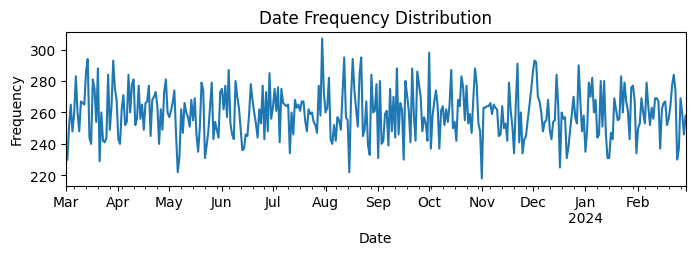

In [ ]:
#check distribution column Date
data_usa['Date'].value_counts().sort_index().plot(kind='line', figsize=(8,2))
plt.title('Date Frequency Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

- From chart I can see ditribution of Date seems balanced, and I will replace miss values within it with median

In [ ]:
#fill missing Total_Purchases
mask_tp = data_usa['Total_Purchases'].isna() & data_usa['Total_Amount'].notna() & data_usa['Amount'].notna()
data_usa.loc[mask_tp, 'Total_Purchases'] = data_usa.loc[mask_tp, 'Total_Amount'] / data_usa.loc[mask_tp, 'Amount']

#fill missing Amount
mask_amt = data_usa['Amount'].isna() & data_usa['Total_Amount'].notna() & data_usa['Total_Purchases'].notna()
data_usa.loc[mask_amt, 'Amount'] = data_usa.loc[mask_amt, 'Total_Amount'] / data_usa.loc[mask_amt, 'Total_Purchases']

#fill missing Total_Amount
mask_ta = data_usa['Total_Amount'].isna() & data_usa['Total_Purchases'].notna() & data_usa['Amount'].notna()
data_usa.loc[mask_ta, 'Total_Amount'] = data_usa.loc[mask_ta, 'Total_Purchases'] * data_usa.loc[mask_ta, 'Amount']

#fill missing Customer_ID with Unknown
data_usa['Customer_ID'] = data_usa['Customer_ID'].fillna(99999.9)

In [ ]:
mask_tp

,0
17800,False
17807,False
17815,False
17841,False
17844,False
...,...
301978,False
301987,False
301989,False
301999,False


In [ ]:
#replace miss values with median and mode
list_column_miss = ['City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Date', 'Product_Category', 'Product_Brand']
for col in list_column_miss:
    if data_usa[col].dtype == 'object':
       data_usa[col].fillna(data_usa[col].mode()[0], inplace=True)
    elif data_usa[col].dtype == 'datetime64[ns]':
       data_usa[col].fillna(data_usa[col].median(), inplace=True)
    else:
       data_usa[col].fillna(data_usa[col].median(), inplace=True)

/tmp/ipython-input-24-1812276011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_usa[col].fillna(data_usa[col].mode()[0], inplace=True)
/tmp/ipython-input-24-1812276011.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
data_usa['City'].fillna(data_usa[col].mode()[0])

,City
0,San Jose
1,Cleveland
2,Philadelphia
3,Atlanta
4,New Orleans
...,...
95200,Miami
95201,Omaha
95202,Dallas
95203,San Antonio


In [ ]:
#check miss values
data_usa.isnull().sum()

,0
Transaction_ID,120
Customer_ID,0
City,0
State,0
Zipcode,0
Country,0
Age,0
Gender,0
Income,0
Date,0


- All missing values are already gone except Transaction_ID

# Manipulation Data

## Dicided Analyze Day

In [ ]:
#import libraries timedelta
from datetime import timedelta

#dicided day one day after last transaction
analyze_date = data_usa['Date'].max() + timedelta(days=1)
analyze_date

Timestamp('2024-03-01 00:00:00')

- Because last transaction happen in 29 February 2024, I diceded to analyze record of transaction 1 day after

## RFM Apply

### Recency
- Count of days between analyze date, and last transaction of customer
- Get smaller number it means customer recently made a transaction

#### Make last transaction for every customers

In [ ]:
#recency formula
last_transaction = data_usa.groupby('Customer_ID').agg({'Date':'max'})
last_transaction = last_transaction.reset_index()
last_transaction = last_transaction.rename(columns = {'Date':'Last_Date'})
last_transaction.sample(5)

,Customer_ID,Last_Date
41159,73363.0,2023-03-27
21422,43028.0,2023-07-26
45196,79556.0,2023-07-15
10071,25443.0,2023-12-10
28768,54328.0,2023-12-19


- last_transaction table is last date Customer made a transaction

#### Apply Recency formula

In [ ]:
#recency formula
recency = last_transaction
recency ['Recency'] = (analyze_date - last_transaction ['Last_Date']).dt.days
recency.sample(5)

,Customer_ID,Last_Date,Recency
14331,32071.0,2024-01-08,53
12408,29072.0,2023-06-27,248
38915,69980.0,2023-11-04,118
11563,27785.0,2023-08-25,189
6826,20472.0,2024-02-11,19


- Calculated between analyze date and last day customer made purchase and then store it to Revcency column

### Frequency
- Calcualted how much transaction that every customers made

#### Apply Frequency formula

In [ ]:
#frequency formula
frequency = data_usa.groupby('Customer_ID').agg({'Transaction_ID':'count'})
frequency = frequency.reset_index()
frequency = frequency.rename(columns = {'Transaction_ID':'Frequency'})
frequency.sample(5)

,Customer_ID,Frequency
29980,56214.0,3
53457,92257.0,1
39566,70949.0,4
9022,23844.0,2
2880,14397.0,1


- This table calculated how much customer made transactions and store values in Frquency column

### Monetary
- How much total money that cusotmers spended

#### Apply Monetary formula

In [ ]:
#monetary formula
monetary = data_usa.groupby('Customer_ID').agg({'Total_Amount':'sum'})
monetary = monetary.reset_index()
monetary = monetary.rename(columns = {'Total_Amount':'Monetary'})
monetary.sample(5)

,Customer_ID,Monetary
15910,34451.0,2910.749512
38132,68748.0,1979.515369
4544,16970.0,2106.511495
19869,40669.0,354.545388
28532,53990.0,953.308393


- This table store total of purchase for every customers

### Merge all RFM table

In [ ]:
#merge all recency, frequency, and monetary become one 2ith main table
data_usa = data_usa.merge(recency[['Customer_ID', 'Last_Date', 'Recency']], on='Customer_ID', how='left')
data_usa = data_usa.merge(frequency[['Customer_ID', 'Frequency']], on='Customer_ID', how='left')
data_usa = data_usa.merge(monetary[['Customer_ID', 'Monetary']], on='Customer_ID', how='left')
data_usa.sample(5)

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Last_Date,Recency,Frequency,Monetary
71704,9490439.0,52585.0,Milwaukee,Arizona,85307.0,USA,43.0,Female,Medium,2023-12-09,3.0,258.365053,775.095159,Books,Random House,Fiction,Fantasy,2023-12-09,83,3,3162.597155
26591,6132057.0,72579.0,Chicago,Connecticut,80889.0,USA,34.0,Female,High,2024-02-07,9.0,270.885350,2437.968149,Grocery,Pepsi,Water,Spring water,2024-02-07,23,2,2783.565230
38105,9030142.0,55123.0,Chicago,Massachusetts,2063.0,USA,46.0,Female,Low,2023-05-19,5.0,131.501416,657.507082,Books,HarperCollins,Non-Fiction,Psychology,2023-10-15,138,2,886.907454
42574,2011419.0,71213.0,Nashville,Massachusetts,2348.0,USA,26.0,Male,Medium,2023-07-24,4.0,149.213973,596.855892,Electronics,Whirepool,Fridge,Black refrigerator,2023-10-20,133,3,1916.339218
76873,7022590.0,21181.0,Oklahoma City,Idaho,83870.0,USA,41.0,Female,Medium,2023-08-07,8.0,365.314253,2922.514022,Clothing,Nike,Shoes,Espadrilles,2023-12-31,61,2,3347.801830


- Table recency, frequency, and monetary have been merged with main table based on Customer_ID

### Make RFM Score

In [ ]:
#make RFM score based on quartile
re_quartiles = data_usa['Recency'].quantile([0.25, 0.50, 0.75]).to_dict()
fre_quartiles = data_usa['Frequency'].quantile([0.25, 0.50, 0.75]).to_dict()
mo_quartiles = data_usa['Monetary'].quantile([0.25, 0.50, 0.75]).to_dict()

- I tried to make RFM score based on quartile and stored it to different variable

In [ ]:
#make an fucntion to give rfm score
def rfm_score(x, quartile):
  if x <= quartile[0.25]:
    return 1
  elif x <= quartile[0.50]:
    return 2
  elif x <= quartile[0.75]:
    return 3
  else:
    return 4

#apply function rfm_score
data_usa['R_Score'] = data_usa['Recency'].apply(lambda x : rfm_score(x, re_quartiles))
data_usa['F_Score'] = data_usa['Frequency'].apply(lambda x : rfm_score(x, fre_quartiles))
data_usa['M_Score'] = data_usa['Monetary'].apply(lambda x : rfm_score(x, mo_quartiles))

- RFM score for this analysis is if it get higher will better
- Rececny --> 1 = old, 4 = recent
- Frequency --> 1 = sometimes, 4 = often
- Monetary --> 1 = small purcahse, 4 = big purchase

In [ ]:
#sum all R, F, an M score then storeed it in RFM_Total
data_usa['RFM_Total'] = data_usa['R_Score'] + data_usa['F_Score'] + data_usa['M_Score']
data_usa.sample(5)

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Last_Date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total
60998,7283087.0,57602.0,Boston,Georgia,86240.0,USA,23.0,Male,High,2023-12-14,3.0,377.464485,1132.393454,Home Decor,Bed Bath & Beyond,Bathroom,Bathtub,2024-02-09,21,3,1937.555140,1,3,2,6
81237,7415617.0,42370.0,Washington,Texas,76578.0,USA,49.0,Male,Low,2023-07-03,10.0,394.435404,3944.354042,Home Decor,Home Depot,Furniture,Nightstand,2023-07-03,242,1,3944.354042,4,1,3,8
11407,6074825.0,17676.0,Columbus,Delaware,19772.0,USA,20.0,Male,Medium,2023-08-07,9.0,29.234970,263.114729,Clothing,Zara,Dress,A-line dress,2023-08-07,207,1,263.114729,4,1,1,6
3952,8782498.0,71439.0,Fort Worth,New Mexico,10371.0,USA,19.0,Female,Low,2023-05-28,6.0,245.056354,1470.338126,Home Decor,Home Depot,Tools,Level,2023-05-28,278,1,1470.338126,4,1,2,7
41557,2892896.0,85311.0,Baltimore,Virginia,22200.0,USA,26.0,Male,Medium,2023-11-26,4.0,458.544076,1834.176305,Clothing,Nike,Shorts,Skorts,2024-02-09,21,4,3621.890690,1,4,3,8


- I sum all of R, F, and M score and stored it to RFM_Total
- Maximmum total from RFM_Segment is 12
- Minimum total from RFM_Segment is 3

### Define Class for score in RFM_Total

In [ ]:
#function to define class
def class_segment(score):
    if score == 12:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalist'
    else:
        return 'Needs Attention'

#apply function class_segment then stored it in new column
data_usa['Customer_Segment'] = data_usa['RFM_Total'].apply(class_segment)
data_usa.sample(5)

,Transaction_ID,Customer_ID,City,State,Zipcode,Country,Age,Gender,Income,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Last_Date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total,Customer_Segment
88424,8234651.0,41853.0,Seattle,South Carolina,29926.0,USA,39.0,Male,Low,2023-05-08,6.0,149.628749,897.772491,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Air conditioner,2023-08-29,185,3,1463.553810,3,3,2,8,Potential Loyalist
23300,3839428.0,59522.0,Chicago,Connecticut,62173.0,USA,34.0,Female,Medium,2023-05-30,3.0,69.266186,207.798557,Electronics,Sony,Smartphone,Google Pixel,2023-05-30,276,1,207.798557,4,1,1,6,Potential Loyalist
17994,6550995.0,89314.0,Chicago,Connecticut,47705.0,USA,34.0,Male,Low,2023-10-02,6.0,277.861116,1667.166698,Electronics,Sony,Headphones,Studio headphones,2023-10-02,151,1,1667.166698,3,1,2,6,Potential Loyalist
8724,7923665.0,52999.0,Houston,Kansas,67879.0,USA,20.0,Male,Low,2023-05-01,8.0,66.583914,532.671308,Electronics,Apple,Smartphone,LG G,2023-07-05,240,3,2835.068100,4,3,3,10,Loyal Customers
46267,4733825.0,51842.0,San Francisco,Maine,48270.0,USA,26.0,Male,High,2023-10-05,4.0,207.291489,829.165957,Home Decor,Bed Bath & Beyond,Bathroom,Shower,2023-10-05,148,1,829.165957,3,1,1,5,Needs Attention


In [ ]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95205 entries, 0 to 95204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    95085 non-null  float64       
 1   Customer_ID       95205 non-null  float64       
 2   City              95205 non-null  object        
 3   State             95205 non-null  object        
 4   Zipcode           95205 non-null  float64       
 5   Country           95205 non-null  object        
 6   Age               95205 non-null  float64       
 7   Gender            95205 non-null  object        
 8   Income            95205 non-null  object        
 9   Date              95205 non-null  datetime64[ns]
 10  Total_Purchases   95205 non-null  float64       
 11  Amount            95205 non-null  float64       
 12  Total_Amount      95205 non-null  float64       
 13  Product_Category  95205 non-null  object        
 14  Product_Brand     9520

Term of class fron RFM_Total:
- Customers that have RFM_Total equal 12 will be define as Champion
- Customers that have RFM_Total equal/greater than 9 will be define as Loyal Customers
- Customers that have RFM_Total equal/greater than 6 will be define as Potential Loyalist
- Customers that have RFM_Total equal/greater than 3 will be define as Need Attention
- Customers that have RFM_Total equal/lower than 2 will be define as At Risk

# Analyze
- I will be analyze based on my bussines questions to get inital insight, and visualization before make and dashboard on Power BI

## 1. Which customer segments contribute the most sales?

In [ ]:
revenue_segment = data_usa.groupby('Customer_Segment')['Total_Amount'].sum().sort_values(ascending = False)
revenue_segment = revenue_segment.reset_index().rename(columns = {'Total_Amount':'Sales_Total'})
revenue_segment

,Customer_Segment,Sales_Total
0,Potential Loyalist,7.554717e+07
1,Loyal Customers,3.853212e+07
2,Needs Attention,1.541604e+07
3,Champions,3.463982e+05


/tmp/ipython-input-38-4038907606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sales_Total', y = 'Customer_Segment', data = revenue_segment, palette = 'viridis')


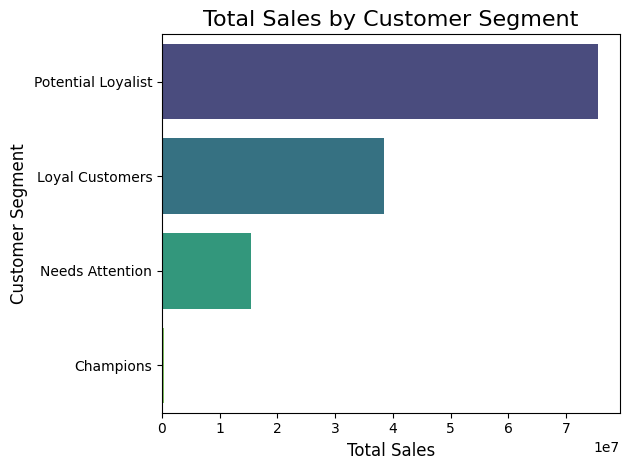

In [ ]:
#visualize revenue segment
sns.barplot(x = 'Sales_Total', y = 'Customer_Segment', data = revenue_segment, palette = 'viridis')
plt.title('Total Sales by Customer Segment', fontsize = 16)
plt.xlabel('Total Sales', fontsize = 12)
plt.ylabel('Customer Segment', fontsize = 12)
plt.tight_layout()
plt.show()

- Potential Loyalist custumers generate highest sales for company
- We have Potential Loyalist customers whisch is good if company can apply right startegy we can shift this into loyal customers
- Need attention don't have lot contribute to sales
- Champion also don't have huge contribute to sales


## 2. Which segments are the largest by number of customers?

In [ ]:
#unique Customer_ID and their segment
unique_customers = data_usa[['Customer_ID', 'Customer_Segment']].drop_duplicates()

#count number of customers per segment
total_customer_segment = unique_customers['Customer_Segment'].value_counts().reset_index()
total_customer_segment.columns = ['Customer_Segment', 'Total_Customers']
total_customer_segment

,Customer_Segment,Total_Customers
0,Potential Loyalist,34651
1,Needs Attention,16090
2,Loyal Customers,7671
3,Champions,55


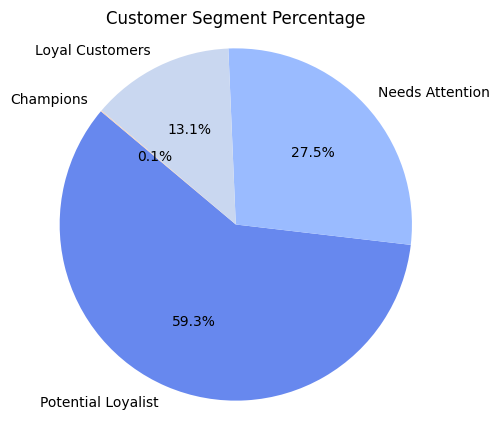

In [ ]:
#visualize total customers segment
plt.figure(figsize = (5,5))
plt.pie(total_customer_segment['Total_Customers'],
        labels = total_customer_segment['Customer_Segment'],
        autopct = '%1.1f%%',
        startangle = 140,
        colors = sns.color_palette('coolwarm'))
plt.title('Customer Segment Percentage')
plt.axis('equal')
plt.show()

- Potential Loyalist is the largest segment, making up 59.3% of all customers
- Needs Attention segment is the second largest at 27.5%.
- Loyal Customers represent 13.1%, a strong base of reliable buyers
- Champions are only 0.1% of the customer base

## 3. Which segments are have highest frequency?

In [ ]:
#frequency total per segment
frequency_total = data_usa.groupby('Customer_Segment')['Frequency'].sum().reset_index()
frequency_total = frequency_total.rename(columns = {'Frequency':'Frequency_Total'})
frequency_total = frequency_total.sort_values('Frequency_Total', ascending = False)
frequency_total

,Customer_Segment,Frequency_Total
3,Potential Loyalist,102026
1,Loyal Customers,78320
2,Needs Attention,25296
0,Champions,929


/tmp/ipython-input-42-2989047685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = frequency_total, x = 'Frequency_Total', y = 'Customer_Segment', palette = 'Blues_d')


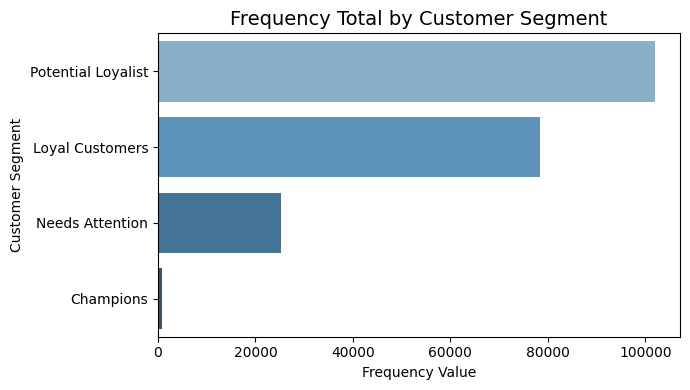

In [ ]:
#visualization of frequency total
plt.figure(figsize=(7,4))
sns.barplot(data = frequency_total, x = 'Frequency_Total', y = 'Customer_Segment', palette = 'Blues_d')

plt.title('Frequency Total by Customer Segment', fontsize = 14)
plt.xlabel('Frequency Value')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()


- Needs Attention segment has the low frequency
- Champions has lowest frequency
- Potential Loyalists have highest frequency


## 4. Trend customer segment over time, are there any change over months?

In [ ]:
#extract Month-Year from your date column
data_usa['Month'] = pd.to_datetime(data_usa['Date']).dt.to_period('M').astype(str)

monthly_segment_trend = data_usa.groupby(['Month', 'Customer_Segment'])['Customer_ID'].nunique().reset_index()
monthly_segment_trend = monthly_segment_trend.rename(columns={'Customer_ID': 'Customer_Count'})
monthly_segment_trend

,Month,Customer_Segment,Customer_Count
0,2023-03,Champions,29
1,2023-03,Loyal Customers,2212
2,2023-03,Needs Attention,284
3,2023-03,Potential Loyalist,5178
4,2023-04,Champions,31
5,2023-04,Loyal Customers,2115
6,2023-04,Needs Attention,281
7,2023-04,Potential Loyalist,5084
8,2023-05,Champions,37
9,2023-05,Loyal Customers,2072


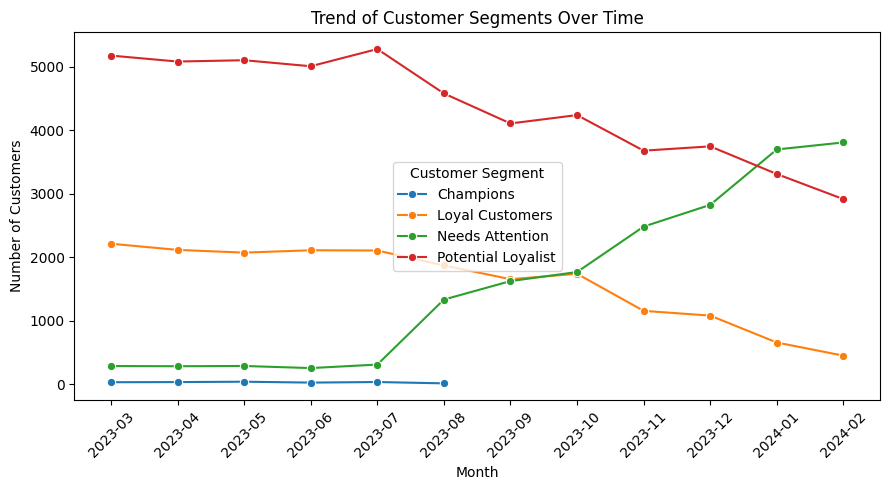

In [ ]:
#visualize customer segment over time
plt.figure(figsize=(9, 5))
sns.lineplot(
    data=monthly_segment_trend,
    x='Month', y='Customer_Count', hue='Customer_Segment',
    marker='o'
)

plt.title('Trend of Customer Segments Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


- Potential Loyalist segment is declining since middle 2023
- Loyal Customers are dropping slowly begin in middle 2023
- Champions consistently low

# Download Clean File

In [ ]:
#dowload data_usa
data_usa.to_csv('data_usa.csv', index=False)
from google.colab import files
files.download('data_usa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>